## Problem Statement:
Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

## Approach: 
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

## Results: 
You have to build a solution that should able to predict the sales of the
different stores of Big Mart according to the provided dataset.

In [1]:
# We have train (8523) and test (5681) data set, train data set has both input and output
# variable(s). We need to predict the sales for test data set.
# Item_Identifier: Unique product ID

# 2

# Item_Weight: Weight of product
# Item_Fat_Content: Whether the product is low fat or not
# Item_Visibility: The % of total display area of all products in a store allocated to the
# particular product
# Item_Type: The category to which the product belongs
# Item_MRP: Maximum Retail Price (list price) of the product
# Outlet_Identifier: Unique store ID
# Outlet_Establishment_Year: The year in which store was established
# Outlet_Size: The size of the store in terms of ground area covered
# Outlet_Location_Type: The type of city in which the store is located
# Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
# Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome
# variable to be predicted. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
import pickle
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)

In [3]:
data = pd.read_csv("sales_data.csv")

## Data Cleaning

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
data.shape

(8523, 12)

In [7]:
data.info()
print("There are To  many Null value in Item_Weight & Outlet_Size")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
There are To  many Null value in Item_Weight 

In [8]:
# Chech the missing Values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# fill na with median
data["Item_Weight"] = data["Item_Weight"].fillna(np.nanmedian(data["Item_Weight"]))
# fill na with mode since it is catigorical data we use mode
data["Outlet_Size"] = data["Outlet_Size"].fillna(st.mode(data["Outlet_Size"]))

In [10]:
# now there is no null value in data 
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
# check duplicet values in dataset
data.duplicated().sum()
print("There is no duplicet value in this datasrt")

There is no duplicet value in this datasrt


In [12]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
# some values in Item_Fat_Content are false so map it with correct value
data["Item_Fat_Content"] = data["Item_Fat_Content"].map({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular',"Low Fat":"Low Fat","Regular":"Regular"})

In [14]:
catigoricl_features = data.select_dtypes(include = "object").columns
print(catigoricl_features)
numerical_features = data.select_dtypes(exclude = "object").columns
print(numerical_features)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


In [15]:
# chack all unique value of catigorical data
for i in catigoricl_features:
    print(i,data[i].value_counts())
    print("*"*60)

Item_Identifier FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
************************************************************
Item_Fat_Content Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
************************************************************
Item_Type Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
************************************************************
Outlet_Identi

## EDA

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


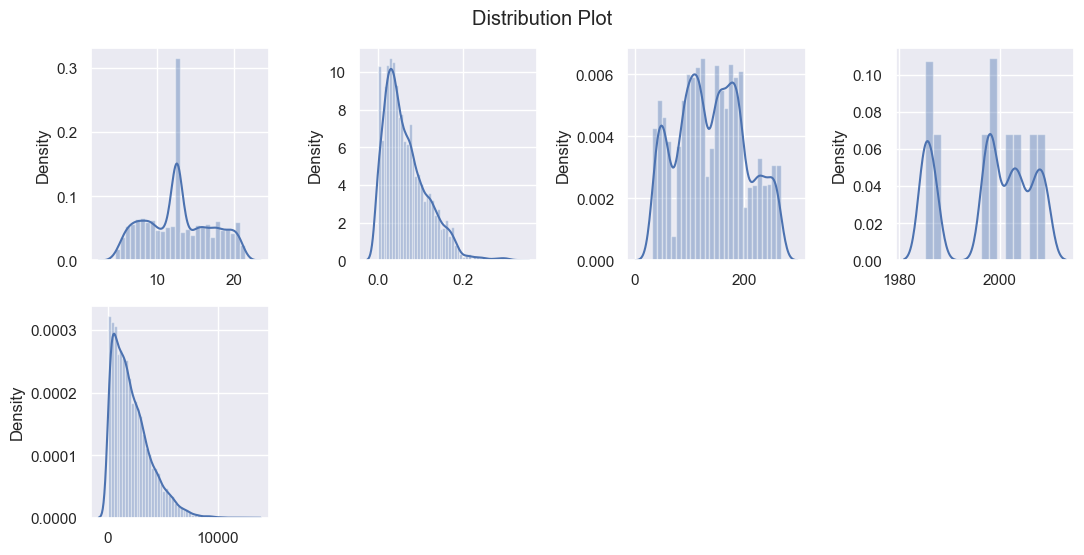

In [16]:
print(numerical_features)
try:
    plt.suptitle("Distribution Plot")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


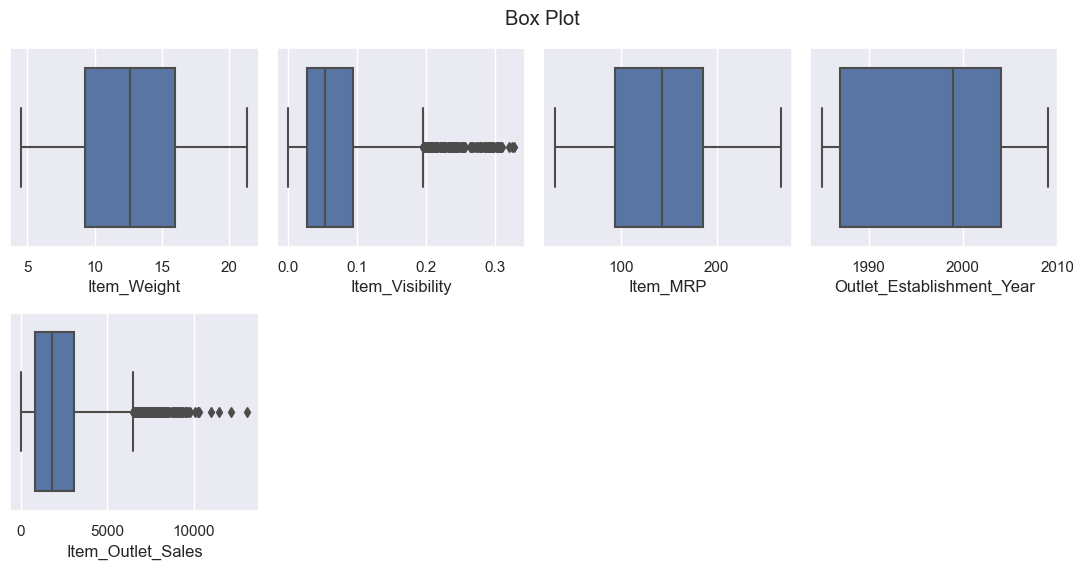

In [17]:
print(numerical_features)
try:
    plt.suptitle("Box Plot")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.boxplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


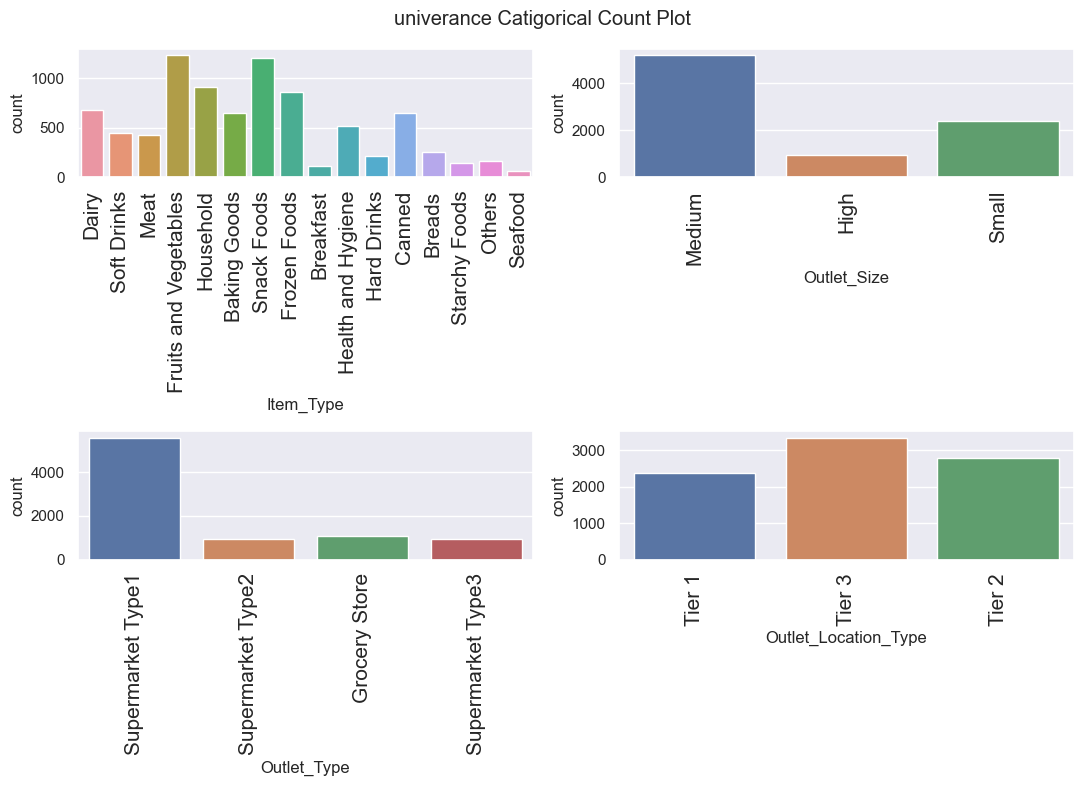

In [18]:
print(catigoricl_features)
cato = ['Item_Type','Outlet_Size','Outlet_Type',"Outlet_Location_Type"]
try:
    plt.suptitle("univerance Catigorical Count Plot")
    for i in range(0,len(cato)):
        plt.subplot(2,2,i+1)
        sns.countplot(x=data[cato[i]])
        plt.tight_layout()
        plt.xticks(size=15,rotation=90)
except Exception as e:
    print(e)

<AxesSubplot:ylabel='Item_Fat_Content'>

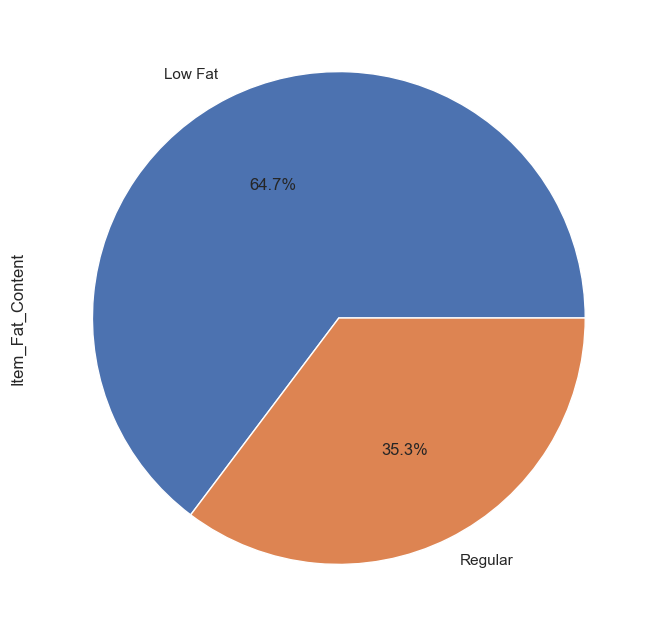

In [19]:
data["Item_Fat_Content"].value_counts().plot.pie(autopct="%1.1f%%")

In [20]:
# data Item_Type and sales
sales = data.groupby("Item_Type")["Item_Outlet_Sales"].sum().sort_values(ascending=False).reset_index()

<AxesSubplot:title={'center':'item outlet sales vs sales'}, xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

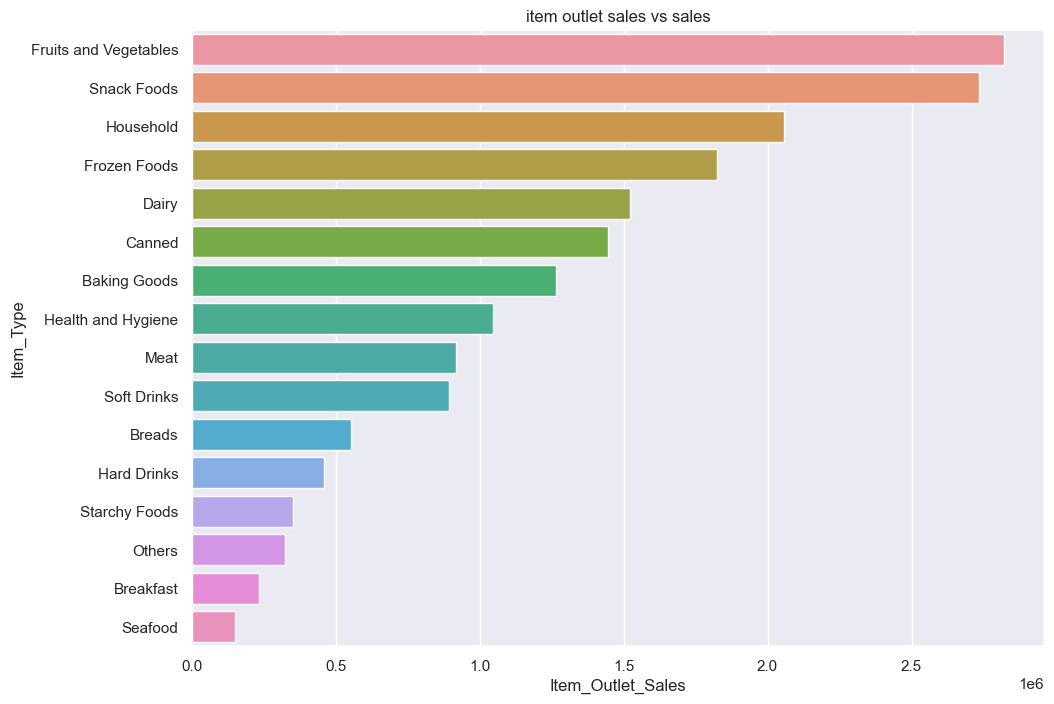

In [21]:
plt.title("item outlet sales vs sales")
sns.barplot(x = "Item_Outlet_Sales",y="Item_Type",data=sales)

In [22]:
Outlet_size = data.groupby("Outlet_Size")["Item_Outlet_Sales"].sum().sort_values(ascending=False).reset_index()

<AxesSubplot:title={'center':'Outlet_Size vs sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

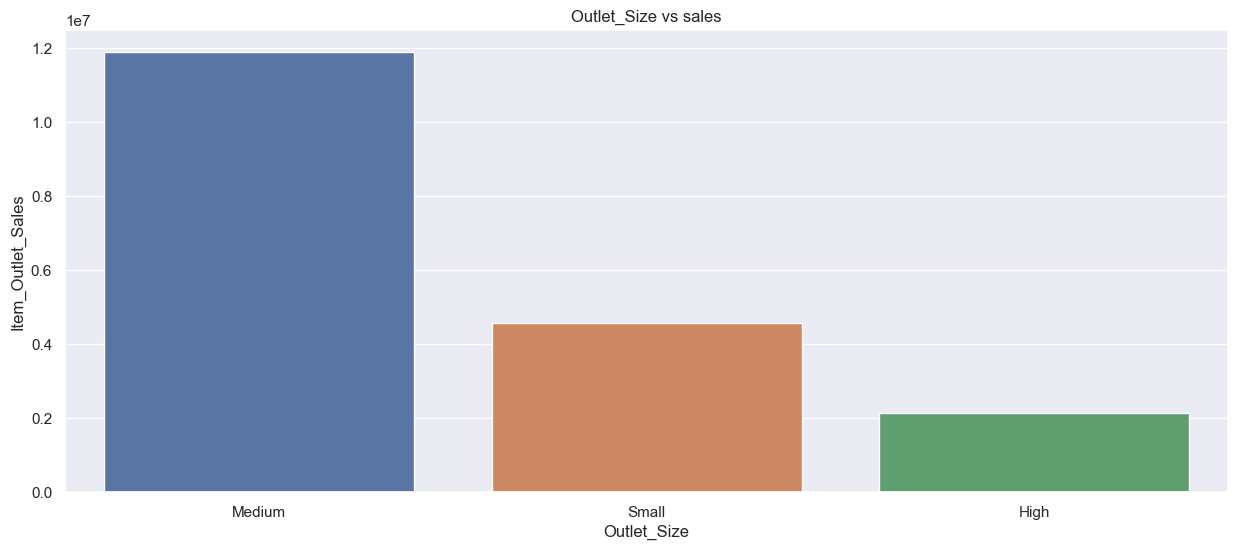

In [23]:
plt.figure(figsize=(15,6))
plt.title("Outlet_Size vs sales")
sns.barplot(x = "Outlet_Size",y="Item_Outlet_Sales",data=Outlet_size)

In [24]:
Outlet_Location_Type = data.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].sum().sort_values(ascending=False).reset_index()

<AxesSubplot:title={'center':'Outlet_Size vs sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

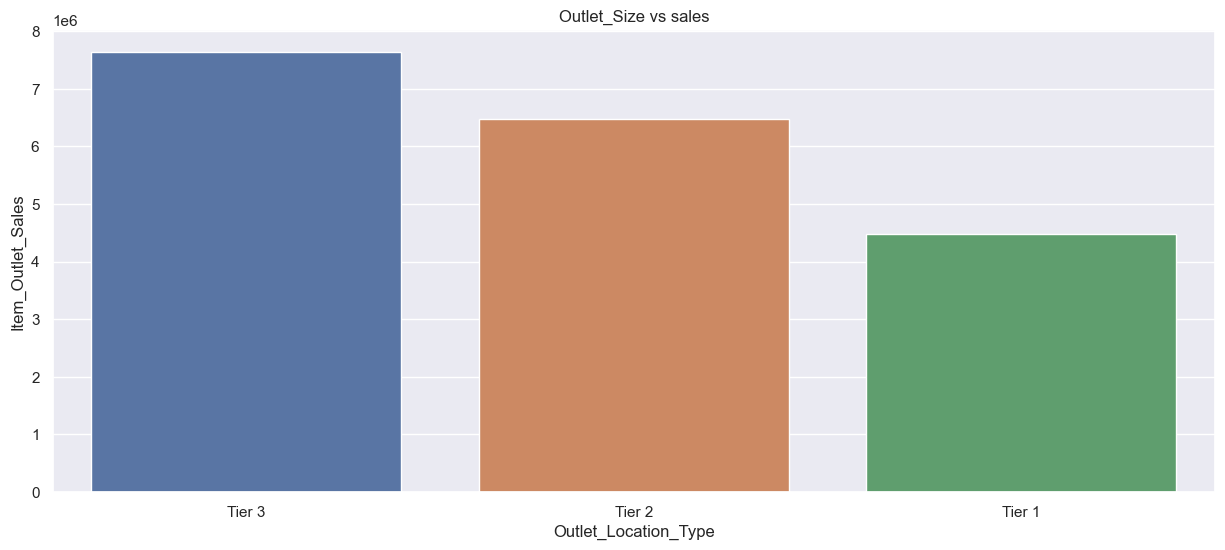

In [25]:
plt.figure(figsize=(15,6))
plt.title("Outlet_Size vs sales")
sns.barplot(x = "Outlet_Location_Type",y="Item_Outlet_Sales",data=Outlet_Location_Type)

In [26]:
Outlet_Establishment_Year = data.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].sum().sort_values(ascending=False).reset_index()

<AxesSubplot:title={'center':'Outlet_Establishment_Year vs sales'}, xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

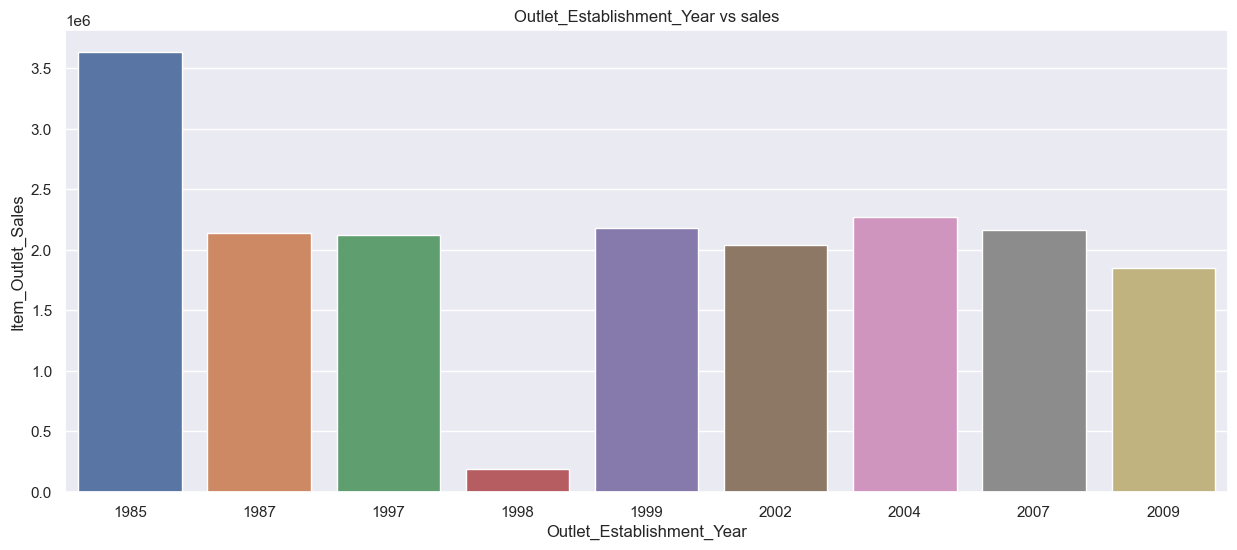

In [27]:
plt.figure(figsize=(15,6))
plt.title("Outlet_Establishment_Year vs sales")
sns.barplot(x = "Outlet_Establishment_Year",y="Item_Outlet_Sales",data=Outlet_Establishment_Year)

In [28]:
Outlet_Type = data.groupby("Outlet_Type")["Item_Outlet_Sales"].sum().sort_values(ascending=False).reset_index()

<AxesSubplot:title={'center':'Outlet_Type vs sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

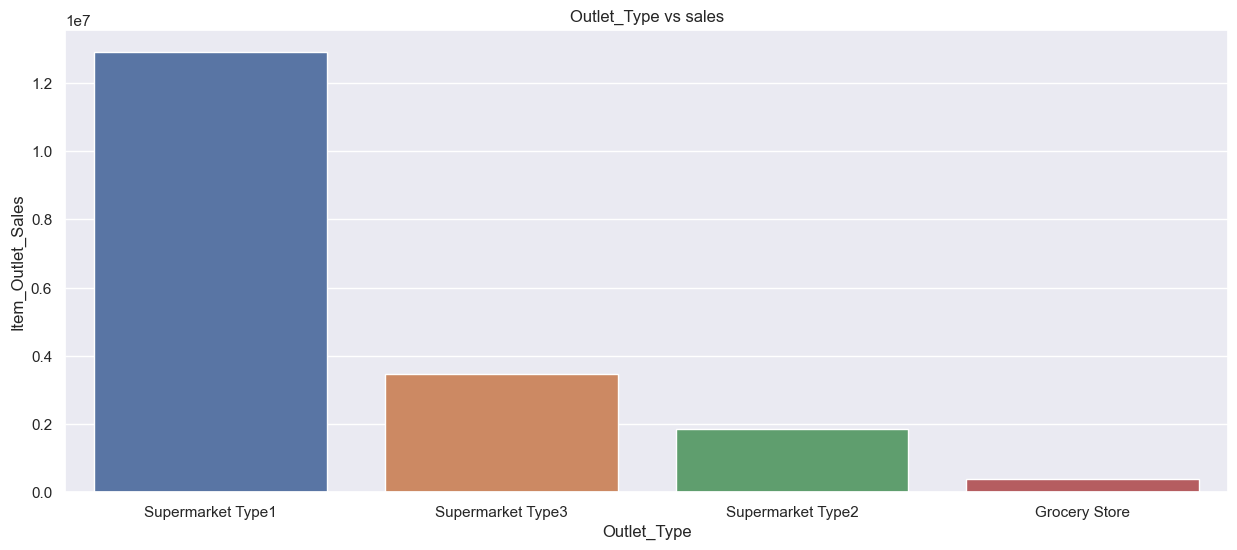

In [29]:
plt.figure(figsize=(15,6))
plt.title("Outlet_Type vs sales")
sns.barplot(x = "Outlet_Type",y="Item_Outlet_Sales",data=Outlet_Type)

## Feature Engeneering

In [30]:
# we extract outlet age from outlate estimate years
data["Outlet_Age"] = 2019-data["Outlet_Establishment_Year"]

In [31]:
data.drop("Item_Identifier",axis=1,inplace=True)
data.drop("Outlet_Establishment_Year",axis=1,inplace=True)

In [32]:
catigoricl_features = data.select_dtypes(include = "object").columns
print(catigoricl_features)
numerical_features = data.select_dtypes(exclude = "object").columns
print(numerical_features)

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')


In [33]:
#we will use Lable Encoding on another catigorical features
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in catigoricl_features:
     data[i] = lable.fit_transform(data[i])

In [34]:
# save clean and final data
data.to_csv("final_sales.csv",index=False)

<AxesSubplot:>

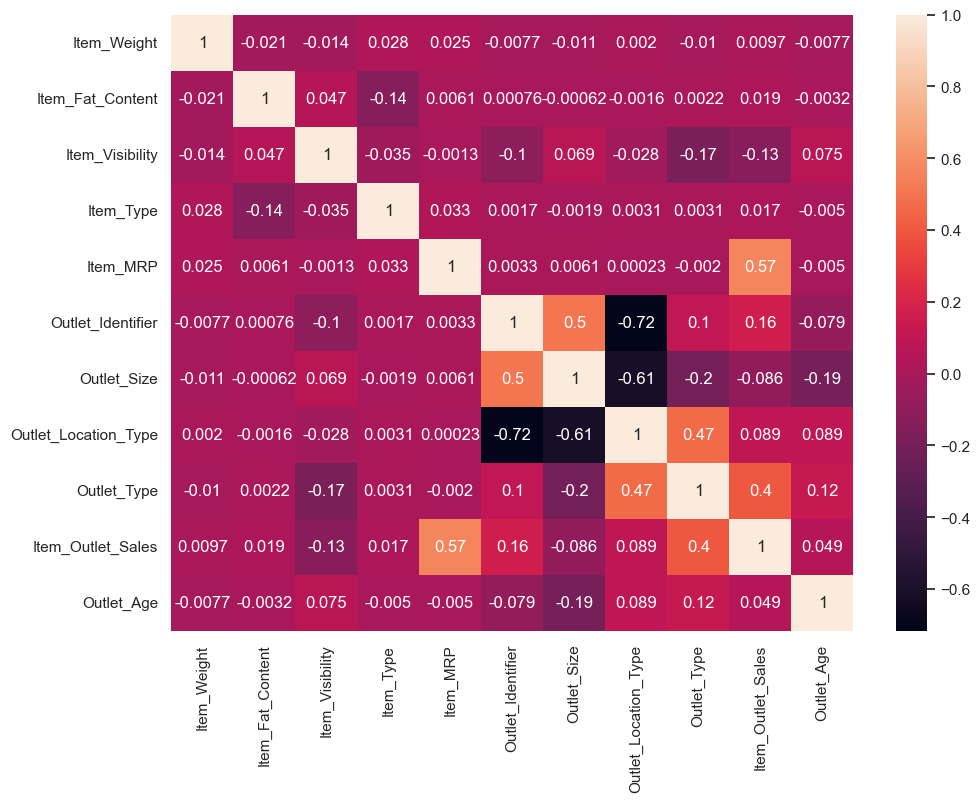

In [35]:
# Check correlations
sns.heatmap(data.corr(),annot=True)

## Model Traning

In [36]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,20
1,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228,10
2,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,20
3,19.20,1,0.000000,6,182.0950,0,1,2,0,732.3800,21
4,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052,32


In [37]:
data.shape

(8523, 11)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   int32  
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   int32  
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   int32  
 6   Outlet_Size           8523 non-null   int32  
 7   Outlet_Location_Type  8523 non-null   int32  
 8   Outlet_Type           8523 non-null   int32  
 9   Item_Outlet_Sales     8523 non-null   float64
 10  Outlet_Age            8523 non-null   int64  
dtypes: float64(4), int32(6), int64(1)
memory usage: 532.8 KB


In [39]:
# Saprate Dependent and Indipendent Feature
x = data.drop("Item_Outlet_Sales",axis=1)
y = data["Item_Outlet_Sales"]

In [40]:
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Age'],
      dtype='object')


In [41]:
from sklearn.impute import SimpleImputer #For missing values
from sklearn.preprocessing import StandardScaler
## Pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [42]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [43]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5710, 10)
(2813, 10)
(5710,)
(2813,)


In [45]:
## Transform Data using Preprocessor obj
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [46]:
# save the best model using pickle
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

In [47]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [48]:
def Model_evalution(test,prediction):
    mse = mean_squared_error(test,prediction)
    mae = mean_absolute_error(test,prediction)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,prediction)
    return mse,rmse,mae,r2score  

In [ ]:
from sklearn.model_selection import GridSearchCV

models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "ElasticNet":ElasticNet(),
    "RandomForestRegressor":RandomForestRegressor(random_state=3),
    "XGBRegressor":XGBRegressor()
}

# HyperParameter Tuning
param_grids = {
    "LinearRegression": {},
    "Ridge": {"alpha": [0.01, 0.1, 1, 10]},
    "Lasso": {"alpha": [0.01, 0.1, 1, 10]},
    "ElasticNet": {"alpha": [0.01, 0.1, 1, 10], "l1_ratio": [0.25, 0.5, 0.75]},
    "RandomForestRegressor": {"n_estimators": [100, 200, 300], "max_depth": [5, 10, None]},
    "XGBRegressor": {"learning_rate": [0.01, 0.1, 1], "max_depth": [3, 5, 7]}
}

model_list = []
r2_list = []
y_predict_list = []


for model_name, model in models.items():
    print(f"Training {model_name}")
    
    # define the grid search object
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], scoring="r2", cv=5, n_jobs=-1)
    
    # fit the grid search object on the training data
    grid_search.fit(X_train, y_train)
    
    # get the best model from the grid search
    best_model = grid_search.best_estimator_
    
    # make predictions on the test data using the best model
    y_pred = best_model.predict(X_test)
    
    # evaluate the model performance
    mse, mae, rmse, r2score = Model_evalution(y_test, y_pred)
    
    # print the model performance
    print("Model Training Performance")
    print("MSE:", mse*100)
    print("MAE:", mae*100)
    print("RMSE:", rmse*100)
    print("R2:", r2score*100)
    print("="*40)
    
    # append the model name and r2 score to the lists
    model_list.append(model_name)
    r2_list.append(r2score*100)
    y_predict_list.append(y_pred)


Training LinearRegression
Model Training Performance
MSE: 137265530.00265947
MAE: 117160.37299473722
RMSE: 87700.26901897485
R2: 51.02428170011704
Training Ridge
Model Training Performance
MSE: 137246442.10115486
MAE: 117152.22665453475
RMSE: 87684.71583986418
R2: 51.031092176767714
Training Lasso
Model Training Performance
MSE: 137206476.38626906
MAE: 117135.16824005892
RMSE: 87670.62259716167
R2: 51.045351762505376
Training ElasticNet
Model Training Performance
MSE: 137238379.0360331
MAE: 117148.78532705027
RMSE: 87678.44558020745
R2: 51.03396904181919
Training RandomForestRegressor


In [ ]:
# get the index of the best model
best_model_index = r2_list.index(max(r2_list))

# fetch the best model name and R2 score
best_model_name = model_list[best_model_index]
best_model_r2 = r2_list[best_model_index]

# print the best model name and R2 score
print(f"Best Model: {best_model_name}")
print(f"R2 Score: {best_model_r2}")

In [ ]:
# save the best model using pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model_r2, file)

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_predict_list[4])
fig.suptitle('Actual vs Predictions Random ForestRegression', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16) 

In [ ]:
y_predict_list[4]

In [ ]:
data.iloc[:,9]